In [6]:
## ANN Boiler group model
import pandas as pd

# Load the data
data = pd.read_csv('HeatingGroupResults.csv')

# Display the first few rows of the dataset
print(data.shape)
data.drop_duplicates(subset = ['Time'], inplace = True)
print(data.shape)
data.reset_index(drop = True, inplace = True)
data.head()

(8761, 25)
(7758, 25)


Time  heatingGroupFmu.mSteDem  heatingGroupFmu.absChiOn  \
0      0.000                15.120000                         0   
1   3600.003                15.690001                         0   
2   7200.006                15.950000                         0   
3  10800.009                16.110000                         0   
4  14400.012                16.620000                         0   

   heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  heatingGroupFmu.pGenTot  \
0                      0.0                7196211.0                7196211.0   
1                      0.0                7400128.0                7400128.0   
2                      0.0                7633626.0                7633626.0   
3                      0.0                7851213.5                7851213.5   
4                      0.0                8088488.5                8088488.5   

   heatingGroupFmu.mSteBoi  heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  \
0                12.196162                16.551176                 0.630410   
1                 8.869211                 6.820704                 0.638050   
2                 9.070895                 6.878871                 0.648258   
3                 9.185088                 6.924853                 0.656661   
4                 9.630474                 6.989388                 0.666584   

   heatingGroupFmu.mFueBoi  ...  heatingGroupFmu.yChp  heatingGroupFmu.TAmb  \
0                 0.000000  ...              0.600000                265.35   
1                 0.462519  ...              0.617002                265.35   
2                 0.473042  ...              0.633973                264.25   
3                 0.478994  ...              0.650883                263.75   
4                 0.502217  ...              0.667701                262.55   

   heatingGroupFmu.boilerFWPum.port_a.p  heatingGroupFmu.chp.botCycExp.Qboi  \
0                                101325                          15932117.0   
1                                101325                          16006166.0   
2                                101325                          16142836.0   
3                                101325                          16250689.0   
4                                101325                          16401971.0   

   heatingGroupFmu.chp.botCycExp.QsteAbs  heatingGroupFmu.chp.botCycExp.Qlos  \
0                                    0.0                          -5670728.5   
1                                    0.0                          -5711944.0   
2                                    0.0                          -5797349.0   
3                                    0.0                          -5858121.5   
4                                    0.0                          -5946766.5   

   heatingGroupFmu.chp.botCycExp.exhQ.y  heatingGroupFmu.qFueChp      qUse  \
0                            21602846.0              30016365.55  21602846   
1                            21700000.0              30380090.80  21718110   
2                            21940186.0              30866137.37  21940186   
3                            22100000.0              31266258.28  22108810   
4                            22348738.0              31738721.05  22348738   

      qUseSum  
0  21602845.5  
1  21718110.0  
2  21940185.0  
3  22108810.5  
4  22348737.5  

[5 rows x 25 columns]

In [7]:
# Outlier clipping
inputs = ['heatingGroupFmu.mSteDem', 'heatingGroupFmu.TAmb', 'heatingGroupFmu.ext', 'heatingGroupFmu.absChiOn', 
          'heatingGroupFmu.yChp','heatingGroupFmu.boilerFWPum.port_a.p'] ##States and actions
outputs = ['heatingGroupFmu.pSteTur', 'heatingGroupFmu.pGasTur', 'heatingGroupFmu.mSteBoi', 
           'heatingGroupFmu.mSteChp', 'heatingGroupFmu.mFueChp', 'heatingGroupFmu.mFueBoi', 'heatingGroupFmu.qAbsChi', 
           'heatingGroupFmu.preChp.p','heatingGroupFmu.preBoi.p', 'heatingGroupFmu.chp.botCycExp.QsteAbs',
          'heatingGroupFmu.chp.botCycExp.Qlos','heatingGroupFmu.chp.botCycExp.exhQ.y','heatingGroupFmu.qFueChp'] 

columns = inputs + outputs

mean = data[columns].mean()
q1 = data[columns].quantile(0.25)
q3 = data[columns].quantile(0.75)
iqr = q3 - q1
# data[columns] = data[columns].clip(q1 - 1.5*iqr, q3 + 1.5*iqr, axis = 1)
data.head()

Time  heatingGroupFmu.mSteDem  heatingGroupFmu.absChiOn  \
0      0.000                15.120000                         0   
1   3600.003                15.690001                         0   
2   7200.006                15.950000                         0   
3  10800.009                16.110000                         0   
4  14400.012                16.620000                         0   

   heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  heatingGroupFmu.pGenTot  \
0                      0.0                7196211.0                7196211.0   
1                      0.0                7400128.0                7400128.0   
2                      0.0                7633626.0                7633626.0   
3                      0.0                7851213.5                7851213.5   
4                      0.0                8088488.5                8088488.5   

   heatingGroupFmu.mSteBoi  heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  \
0                12.196162                16.551176                 0.630410   
1                 8.869211                 6.820704                 0.638050   
2                 9.070895                 6.878871                 0.648258   
3                 9.185088                 6.924853                 0.656661   
4                 9.630474                 6.989388                 0.666584   

   heatingGroupFmu.mFueBoi  ...  heatingGroupFmu.yChp  heatingGroupFmu.TAmb  \
0                 0.000000  ...              0.600000                265.35   
1                 0.462519  ...              0.617002                265.35   
2                 0.473042  ...              0.633973                264.25   
3                 0.478994  ...              0.650883                263.75   
4                 0.502217  ...              0.667701                262.55   

   heatingGroupFmu.boilerFWPum.port_a.p  heatingGroupFmu.chp.botCycExp.Qboi  \
0                                101325                          15932117.0   
1                                101325                          16006166.0   
2                                101325                          16142836.0   
3                                101325                          16250689.0   
4                                101325                          16401971.0   

   heatingGroupFmu.chp.botCycExp.QsteAbs  heatingGroupFmu.chp.botCycExp.Qlos  \
0                                    0.0                          -5670728.5   
1                                    0.0                          -5711944.0   
2                                    0.0                          -5797349.0   
3                                    0.0                          -5858121.5   
4                                    0.0                          -5946766.5   

   heatingGroupFmu.chp.botCycExp.exhQ.y  heatingGroupFmu.qFueChp      qUse  \
0                            21602846.0              30016365.55  21602846   
1                            21700000.0              30380090.80  21718110   
2                            21940186.0              30866137.37  21940186   
3                            22100000.0              31266258.28  22108810   
4                            22348738.0              31738721.05  22348738   

      qUseSum  
0  21602845.5  
1  21718110.0  
2  21940185.0  
3  22108810.5  
4  22348737.5  

[5 rows x 25 columns]

In [ ]:
# # Define inputs and outputs
# ##ANN outputs

# # Create input and output datasets
# X = pd.concat([data[inputs].iloc[1:].reset_index(drop = True), data[outputs].iloc[:-1]], axis=1)
# y = data[outputs].iloc[1:]

# X.index = data.Time[1:]
# y.index = data.Time[1:]
# # X = X.iloc[1:]
# # X = pd.concat([X, y.iloc[:-1]], axis=1, ignore_index=True)

NameError: name 'pd' is not defined

In [8]:
X = data[inputs]
y = data[outputs]

In [9]:
X.head()

heatingGroupFmu.mSteDem  heatingGroupFmu.TAmb  heatingGroupFmu.ext  \
0                15.120000                265.35                    0   
1                15.690001                265.35                    0   
2                15.950000                264.25                    0   
3                16.110000                263.75                    0   
4                16.620000                262.55                    0   

   heatingGroupFmu.absChiOn  heatingGroupFmu.yChp  \
0                         0              0.600000   
1                         0              0.617002   
2                         0              0.633973   
3                         0              0.650883   
4                         0              0.667701   

   heatingGroupFmu.boilerFWPum.port_a.p  
0                                101325  
1                                101325  
2                                101325  
3                                101325  
4                                101325

In [10]:
y.head()

heatingGroupFmu.pSteTur  heatingGroupFmu.pGasTur  heatingGroupFmu.mSteBoi  \
0                      0.0                7196211.0                12.196162   
1                      0.0                7400128.0                 8.869211   
2                      0.0                7633626.0                 9.070895   
3                      0.0                7851213.5                 9.185088   
4                      0.0                8088488.5                 9.630474   

   heatingGroupFmu.mSteChp  heatingGroupFmu.mFueChp  heatingGroupFmu.mFueBoi  \
0                16.551176                 0.630410                 0.000000   
1                 6.820704                 0.638050                 0.462519   
2                 6.878871                 0.648258                 0.473042   
3                 6.924853                 0.656661                 0.478994   
4                 6.989388                 0.666584                 0.502217   

   heatingGroupFmu.qAbsChi  heatingGroupFmu.preChp.p  \
0                      0.0                 97215.875   
1                      0.0                896603.800   
2                      0.0                896897.940   
3                      0.0                896969.750   
4                      0.0                896400.500   

   heatingGroupFmu.preBoi.p  heatingGroupFmu.chp.botCycExp.QsteAbs  \
0                  99447.07                                    0.0   
1                 897783.75                                    0.0   
2                 898132.20                                    0.0   
3                 898235.20                                    0.0   
4                 897791.70                                    0.0   

   heatingGroupFmu.chp.botCycExp.Qlos  heatingGroupFmu.chp.botCycExp.exhQ.y  \
0                          -5670728.5                            21602846.0   
1                          -5711944.0                            21700000.0   
2                          -5797349.0                            21940186.0   
3                          -5858121.5                            22100000.0   
4                          -5946766.5                            22348738.0   

   heatingGroupFmu.qFueChp  
0              30016365.55  
1              30380090.80  
2              30866137.37  
3              31266258.28  
4              31738721.05

In [11]:
X.shape

(7758, 6)

In [12]:
y.shape

(7758, 13)

In [13]:
index = pd.Series(X.index)

In [14]:
month = 30*86400
import numpy as np
def split_data_20_10(X, y):
    X_train, X_test, y_train, y_test = [], [], [], []
    index = pd.Series(X.index)
    for i in range(0, int(X.index[-1])//month):

        index_filter = index[(index >= i*30*86400) & (index<=(i+1)*30*86400)]
        
        X_train.append(X.loc[index_filter[:int(len(index_filter)*0.7)]])
        y_train.append(y.loc[index_filter[:int(len(index_filter)*0.7)]])
        X_test.append(X.loc[index_filter[int(len(index_filter)*0.7):]])
        y_test.append(y.loc[index_filter[int(len(index_filter)*0.7):]])

    return np.vstack(X_train), np.vstack(X_test), np.vstack(y_train), np.vstack(y_test)

In [ ]:
# X_train, X_test, y_train, y_test = split_data_20_10(X, y)

ValueError: need at least one array to concatenate

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Split the data
# X_train, X_test, y_train, y_test = X.iloc[:int(0.8*len(X))], X.iloc[int(0.8*len(X)):], y.iloc[:int(0.8*len(y))], y.iloc[int(0.8*len(y)):]

# Normalize the features
scaler_X = MinMaxScaler().fit(X_train)
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

scaler_y = MinMaxScaler().fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)



In [18]:
X_train.shape

(5430, 6)

In [20]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torch.utils.data import DataLoader, TensorDataset

# Define the PyTorch model
class BoilerTimeSeriesModel(pl.LightningModule):
    def __init__(self, input_size, output_size, learning_rate=1e-3, n_timesteps = 10):
        super(BoilerTimeSeriesModel, self).__init__()
        self.learning_rate = learning_rate
        
        # Define the architecture
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.Sigmoid(),
            nn.Linear(128, 64),
            nn.Sigmoid(),
            nn.Linear(64, output_size),
            nn.Sigmoid(),
        )
        
        # Loss function
        self.loss_fn = nn.MSELoss()
        self.n_timesteps = n_timesteps
    
    def forward(self, x):
        return self.model(x)
    
    def training_step(self, batch, batch_idx):
        X_batch, y_batch = batch
        
        loss = 0.0
        
        pred = model(X_batch)
        loss+= self.loss_fn(pred, y_batch)
# #         for i in range(self.n_timesteps):
            
# #             pred = self()
# #             loss += self.loss_fn(
        
#         for i in range(X_batch.size(0) - self.n_timesteps):  # For each observation
#             predictions = []
#             # Initialize prediction with the first timestep
#             prediction = self(X_batch[i].unsqueeze(0))  # Forward pass
#             predictions.append(prediction)
            
#             for t in range(1, self.n_timesteps):
#                 # Generate predictions for the next timesteps
#                 input_seq = torch.cat((X_batch[i + t, :6], prediction.squeeze()), dim=0).unsqueeze(0)
#                 prediction = self(input_seq)
#                 predictions.append(prediction)
            
#             # Compute loss for the sequence of predictions against ground truth
#             y_true = y_batch[i:i+self.n_timesteps]
#             y_pred = torch.cat(predictions).view(self.n_timesteps, -1)
#             loss += self.loss_fn(y_pred, y_true)
        
        self.log("loss", loss, on_step = True, on_epoch=True, prog_bar=True, logger=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

# Create the PyTorch Lightning Trainer
trainer = pl.Trainer(max_epochs=30, logger=True)

# Assuming X_train and y_train are your data as PyTorch tensors
# Convert your dataset to PyTorch DataLoader
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Instantiate the model
input_size = X_train.shape[1]
output_size = len(outputs)
model = BoilerTimeSeriesModel(input_size, output_size)

# Train the model
trainer.fit(model, train_loader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name    | Type       | Params
---------------------------------------
0 | model   | Sequential | 10.0 K
1 | loss_fn | MSELoss    | 0     
---------------------------------------
10.0 K    Trainable params
0         Non-trainable params
10.0 K    Total params
0.040     Total estimated model params size (MB)
c:\Users\tanma\anaconda3\envs\pysparkenv\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 29: 100%|██████████| 170/170 [00:02<00:00, 62.47it/s, v_num=12, loss_step=0.00114, loss_epoch=0.00119] 

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 29: 100%|██████████| 170/170 [00:02<00:00, 62.00it/s, v_num=12, loss_step=0.00114, loss_epoch=0.00119]


In [21]:
import matplotlib.pyplot as plt 

In [22]:
# Make predictions
with torch.no_grad():
    y_pred = model(torch.Tensor(X_test)).numpy()

# Convert predictions and actual values to DataFrames for easier manipulation
predictions_df = pd.DataFrame(scaler_y.inverse_transform(y_pred), columns=outputs)
actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test), columns=outputs)


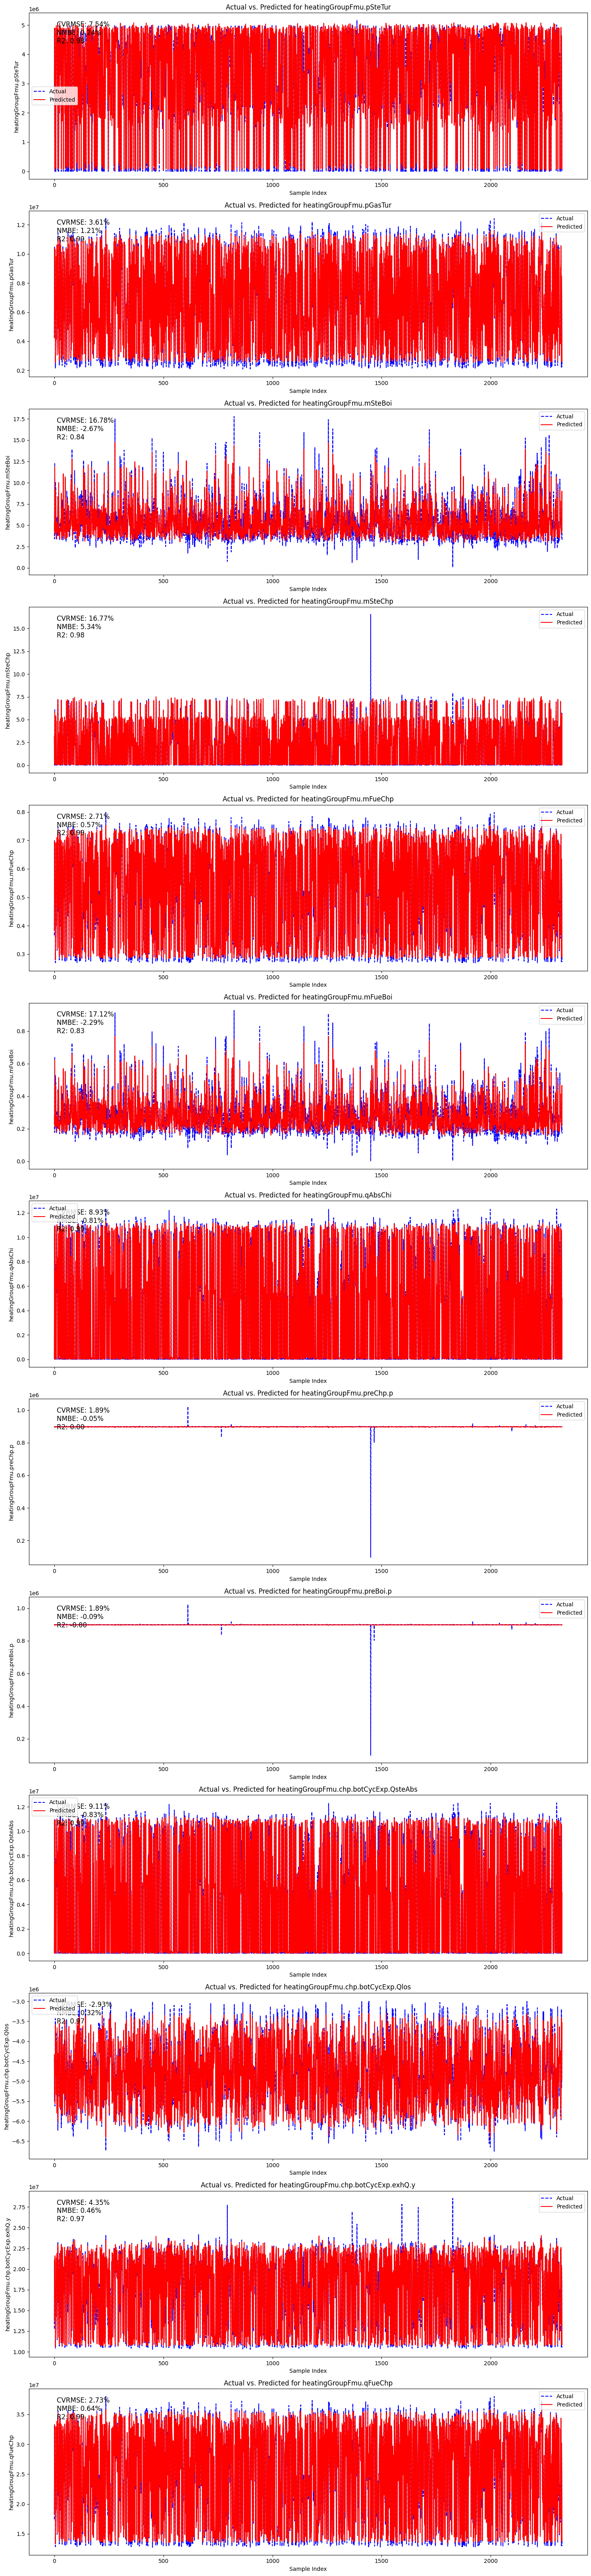

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def calculate_metrics(actuals, predictions):
    metrics = {}
    for output in actuals.columns:
        actual_values = actuals[output]
        predicted_values = predictions[output]
        
        # Calculate metrics
        mse = mean_squared_error(actual_values, predicted_values)
        rmse = np.sqrt(mse)
        mean_actual = np.mean(actual_values)
        
        # CVRMSE (Coefficient of Variation of RMSE)
        cvrmse = (rmse / mean_actual) * 100
        
        # NMBE (Normalized Mean Bias Error)
        nmbe = (np.mean(predicted_values - actual_values) / mean_actual) * 100
        
        # R2 (Coefficient of Determination)
        r2 = r2_score(actual_values, predicted_values)
        
        metrics[output] = {'CVRMSE': cvrmse, 'NMBE': nmbe, 'R2': r2}
    return metrics

def plot_actual_vs_predicted(actuals, predictions, output_names):
    metrics = calculate_metrics(actuals, predictions)
    
    num_outputs = len(output_names)
    plt.figure(figsize=(15, num_outputs * 5))
    
    for i, output in enumerate(output_names):
        plt.subplot(num_outputs, 1, i + 1)
        plt.plot(actuals.index, actuals[output], label='Actual', color='blue', linestyle='--')
        plt.plot(predictions.index, predictions[output], label='Predicted', color='red', linestyle='-')
        
        # Retrieve metrics for current output
        cvrmse = metrics[output]['CVRMSE']
        nmbe = metrics[output]['NMBE']
        r2 = metrics[output]['R2']
        
        # Print metrics on plot
        plt.title(f'Actual vs. Predicted for {output}')
        plt.xlabel('Sample Index')
        plt.ylabel(output)
        plt.legend()
        plt.text(0.05, 0.95, f'CVRMSE: {cvrmse:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.90, f'NMBE: {nmbe:.2f}%', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
        plt.text(0.05, 0.85, f'R2: {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    
    plt.tight_layout()
    plt.show()

# Call the updated plotting function
plot_actual_vs_predicted(actuals_df, predictions_df, outputs)


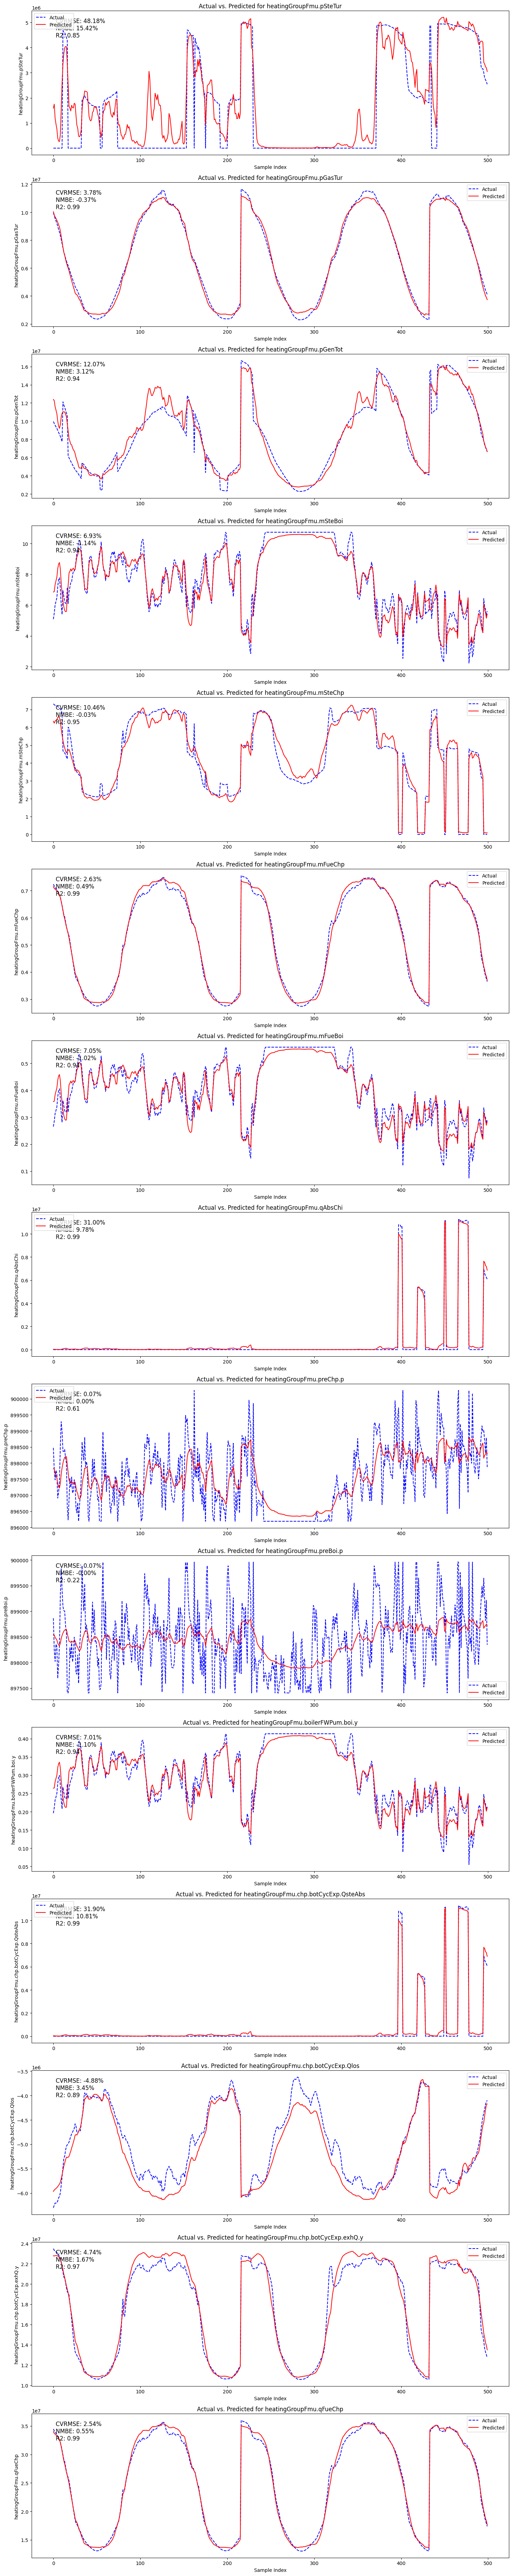

In [33]:
predictions = []

with torch.no_grad():
    prediction = model(torch.Tensor(X_test[0].reshape(1, -1))).numpy()
    predictions.append(prediction)
    for row_idx in range(1, 500):

        
        prediction = model(torch.Tensor(np.concatenate([X_test[row_idx][:6], prediction.reshape(-1, )]).reshape(1, -1))).numpy()
        predictions.append(prediction)

    predictions = np.array(predictions)
    predictions_df = pd.DataFrame(scaler_y.inverse_transform(predictions.reshape(-1, 15)), columns=outputs)
    actuals_df = pd.DataFrame(scaler_y.inverse_transform(y_test[:500]), columns=outputs)    
    plot_actual_vs_predicted(actuals_df, predictions_df, outputs)
